# Sparse-pole representation

## Theory

We explain how to transform expansion coefficients in IR to sparse-pole representation (SPR) [1,2].
We model the spectral function as

$$
    \rho(\omega) = \sum_{p=1}^L c_p \delta(\omega - \bar{\omega}_p),
$$

where sampling frequencies $\{\bar{\omega}_1, \cdots, \bar{\omega}_{L}\}$ are chosen to the extrema of $V'_{L-1}(\omega)$.
This choice is heuristic but allows us a numerically stable transform between $\rho_l$ and $c_p$ through the relation

$$
\rho_l = \sum_{p=1}^L \boldsymbol{V}_{lp} c_p,
$$

where the matrix $\boldsymbol{V}_{lp}~[\equiv V_l(\bar{\omega}_p)]$ is well-conditioned.
Notet that Discrete Lehmann Representation (DLR) [3] choose poles in a more systematic way.
As a result, in SPR, the Green's function is represented as

$$
G(\mathrm{i}\omega_n) = \sum_{p=1}^L \frac{c_p}{\mathrm{i}\omega_n - \bar{\omega}_p}.
$$

[1] H. Shinaoka and Y. Nagai, Phys. Rev. B 103, 045120 (2021).<br>
[2] H. Shinaoka et al., arXiv:2106.12685v2.<br>
[3] J. Kaye, K. Chen, O. Parcollet, arXiv:2107.13094v2.<br>

We consider the semi circular DOS

$$
\rho(\omega) = \sqrt{\frac{2}{\pi}} \sqrt{1-\omega^2}.
$$

The corresponding Green's function is given by

$$
G(\mathrm{i}\omega_n) = \int_{-1}^1 \mathrm{d}\omega \frac{\rho(\omega)}{\mathrm{i}\omega_n - \omega}.
$$

The Green's function is expanded in IR as

$$
G_l = - S_l \int_{-1}^1 \mathrm{d}\omega \rho(\omega) V_l(\omega).
$$

Below, we demonstrate how to transform $G_l$ to the SPR coefficients $c_p$.

In [1]:
import numpy as np
from sparse_ir import FiniteTempBasis, MatsubaraSampling
from sparse_ir.spr import SparsePoleRepresentation

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 15

## Implementation

### Create basis object

In [2]:
wmax = 1.0
lambda_ = 1e+4
beta = lambda_/wmax

basis = FiniteTempBasis("F", beta, wmax, eps=1e-15)
print(basis.size)

104


### Setup model

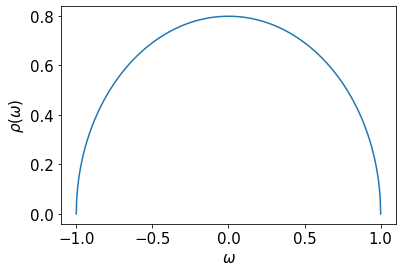

In [3]:
rho = lambda omega: np.sqrt(1-omega**2)/np.sqrt(0.5*np.pi)

omega = np.linspace(-wmax, wmax, 1000)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\rho(\omega)$')
plt.plot(omega, rho(omega))
plt.show()

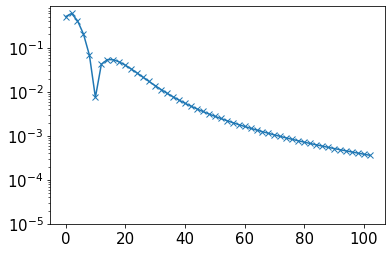

In [4]:
rhol = basis.v.overlap(rho)
ls = np.arange(basis.size)
plt.semilogy(ls[::2], np.abs(rhol)[::2], marker="x")
plt.ylim([1e-5, None])
plt.show()

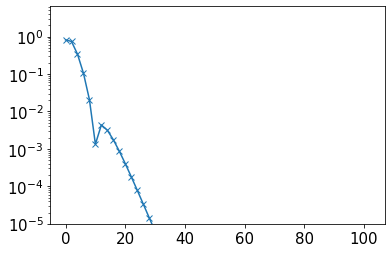

In [5]:
gl = - basis.s * rhol
plt.semilogy(ls[::2], np.abs(gl)[::2], marker="x")
plt.ylim([1e-5, None])
plt.show()

### Create a SPR object and perform transformation

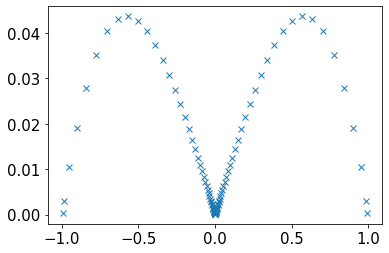

In [6]:
spr = SparsePoleRepresentation(basis)

# To SPR
g_spr = spr.from_IR(gl)

plt.plot(spr.sampling_points, g_spr, marker="x", ls="")
plt.show()

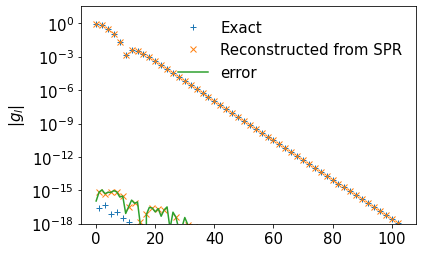

In [7]:
# Transform back to IR from SPR
gl_reconst = spr.to_IR(g_spr)

plt.semilogy(np.abs(gl), label="Exact", ls="", marker="+")
plt.semilogy(np.abs(gl_reconst), label="Reconstructed from SPR", ls="", marker="x")
plt.semilogy(np.abs(gl-gl_reconst), label="error")
plt.ylim([1e-18,None])
plt.ylabel("$|g_l|$")
plt.legend(loc="best", frameon=False)
plt.show()

### Evaluation on Matsubara frequencies

/home/jovyan/.local/lib/python3.9/site-packages/sparse_ir/sampling.py:34: ConditioningWarning: Sampling matrix is poorly conditioned (cond = 2.7e+15)
  warn("Sampling matrix is poorly conditioned (cond = %.2g)"


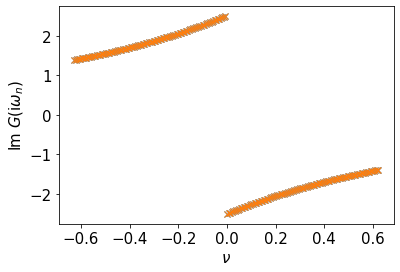

In [8]:
v = 2*np.arange(-1000, 1000, 10) + 1
iv = 1j * v * (np.pi/beta)

transmat = 1/(iv[:,None] - spr.sampling_points[None,:])
giv = transmat @ g_spr

giv_exact = MatsubaraSampling(basis, v).evaluate(gl)

plt.plot(iv.imag, giv_exact.imag, ls="", marker="x", label="Exact")
plt.plot(iv.imag, giv.imag, ls="", marker="x", label="Reconstructed from SPR")
plt.xlabel(r"$\nu$")
plt.ylabel(r"Im $G(\mathrm{i}\omega_n)$")

plt.show()